In [ ]:
pip install python

ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [ ]:
import pandas as pd

# **Visualising DATA**

In [ ]:
data = pd.read_csv('/content/training_data.csv', encoding='latin-1')

data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/training_data.csv'

In [ ]:
# drop unnecessary columns and rename cols

data.drop(['volunteers_count', 'judgment_confidence','id'], axis=1, inplace=True)


data.head()

,text,class
0,i would not feel hesitant in using the medical...,4
1,i try to stuff my wildly feeling heart and mes...,0
2,i just need to find ways to feel pretty,1
3,i think the protection part is the part where ...,0
4,im feeling mellow and am enjoying the cooler w...,1


In [ ]:
# check missing values

data.isna().sum()

text     0
class    0
dtype: int64

In [ ]:
# check data shape

data.shape

(15464, 2)

<Axes: xlabel='class'>

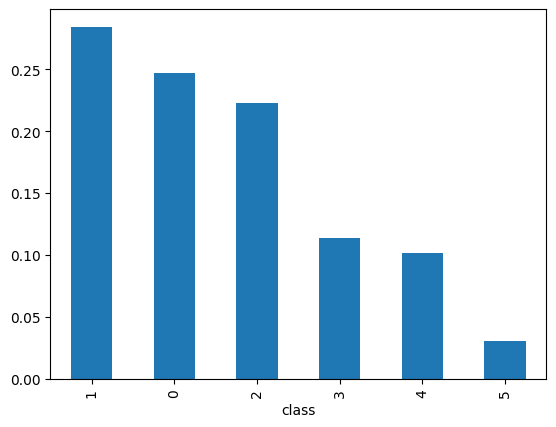

In [ ]:
# check target balance

data['class'].value_counts(normalize = True).plot.bar()

In [ ]:
data = data[data['class'] != 5]


<Axes: xlabel='class'>

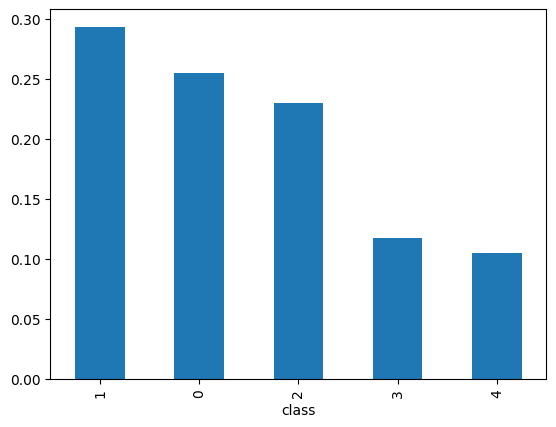

In [ ]:
# check target balance without class number 5 cause it stands for nothing

data['class'].value_counts(normalize = True).plot.bar()

# **PreProcessing dataset**

1.  Remove all special characters
2.  Lowercase all the words
3.  Tokenize
4.  Remove stopwords
5. Lemmatize










In [ ]:
# text preprocessing




# download nltk (liberary fiha les utilises pour preprocessing)

import nltk

nltk.download('all')




# create a list text

text = list(data['text'])




# preprocessing loop

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()




corpus = []




for i in range(len(text)):

    r = re.sub('[^a-zA-Z]', ' ', text[i])

    r = r.lower()

    r = r.split()

    r = [word for word in r if word not in stopwords.words('english')]

    r = [lemmatizer.lemmatize(word) for word in r]

    r = ' '.join(r)

    corpus.append(r)




#assign corpus to data['text']

data['text'] = corpus

data.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

,text,class
0,would feel hesitant using medical system needed,4
1,try stuff wildly feeling heart messy inside sa...,0
2,need find way feel pretty,1
3,think protection part part feel abused reason ...,0
4,im feeling mellow enjoying cooler weather,1


In [ ]:
print(data.head(20))

                                                 text  class
0     would feel hesitant using medical system needed      4
1   try stuff wildly feeling heart messy inside sa...      0
2                           need find way feel pretty      1
3   think protection part part feel abused reason ...      0
4           im feeling mellow enjoying cooler weather      1
5                            feel let alone give shit      0
6                          female guinea pig pregnant      2
7                           break leaf feeling bitter      3
8      recently ill premature baby feel le devastated      0
9                              im sure feel wonderful      1
10                                               exam      4
11           feel heartbroken worried wicked headache      0
12                       feel heartless saying though      3
13   survived low part crash im starting feel hopeful      1
14         begin feel unpleasant anime fandom general      0
15  brandish article any

# **Train-test-split**

In [ ]:
# Create Feature and Label sets

X = data['text']

y = data['class']




# train test split (66% train - 33% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)




print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (10044,)
Testing Data :  (4948,)


## **Feature Extraction**

The two most common methods for extracting feature from text or in other words converting text data (strings) into numeric features so machine learning model can be trained are: Bag of Words (a.k.a CountVectorizer) and Tf-IDF.

# WE use here Bag of Words

Here, we use the Bag of Words model (CountVectorizer) to convert the cleaned text into numeric features. This is needed for training the machine learning model.




In [ ]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(10044, 14675)

# **Model training and evaluation**

In [ ]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)




# transform X_test using CV

X_test_cv = cv.transform(X_test)




# generate predictions

predictions = lr.predict(X_test_cv)

predictions

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, ..., 1, 2, 4])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1257
           1       0.96      0.96      0.96      1459
           2       0.96      0.99      0.98      1110
           3       0.90      0.86      0.88       579
           4       0.95      0.83      0.89       543

    accuracy                           0.94      4948
   macro avg       0.93      0.92      0.93      4948
weighted avg       0.94      0.94      0.94      4948

Confusion Matrix:
[[1187   23    6   29   12]
 [  26 1407   11    7    8]
 [   2    6 1101    1    0]
 [  45   19   15  496    4]
 [  40   18   13   21  451]]


# **TRYING OTHER MACHINE LEARNING MODELS**

SVM (Support Vector Machine)

In [ ]:
# Train a Support Vector Machine (SVM) classifier
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train_cv, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test_cv)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1257
           1       0.96      0.94      0.95      1459
           2       0.97      0.98      0.98      1110
           3       0.87      0.90      0.88       579
           4       0.90      0.85      0.88       543

    accuracy                           0.93      4948
   macro avg       0.92      0.92      0.92      4948
weighted avg       0.93      0.93      0.93      4948



Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_cv, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test_cv)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1257
           1       0.91      0.94      0.92      1459
           2       0.95      0.99      0.97      1110
           3       0.87      0.83      0.85       579
           4       0.92      0.80      0.86       543

    accuracy                           0.92      4948
   macro avg       0.91      0.89      0.90      4948
weighted avg       0.92      0.92      0.91      4948



NOTE: we remark the more we are using classification models as the two we used above, the accuracy is decreasing

Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_cv,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_cv)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1257
           1       0.96      0.92      0.94      1459
           2       0.96      0.98      0.97      1110
           3       0.85      0.90      0.87       579
           4       0.89      0.86      0.87       543

    accuracy                           0.93      4948
   macro avg       0.92      0.92      0.92      4948
weighted avg       0.93      0.93      0.93      4948



K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train_cv, y_train)

# Generate predictions
knn_predictions = knn_classifier.predict(X_test_cv)

In [ ]:
# Print classification report and confusion matrix
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions))
print("K-Nearest Neighbors Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.77      0.60      1257
           1       0.62      0.63      0.63      1459
           2       0.97      0.88      0.92      1110
           3       0.51      0.31      0.38       579
           4       0.65      0.19      0.29       543

    accuracy                           0.63      4948
   macro avg       0.65      0.55      0.57      4948
weighted avg       0.66      0.63      0.62      4948

K-Nearest Neighbors Confusion Matrix:
[[962 229   3  46  17]
 [462 915   7  50  25]
 [ 48  44 979  34   5]
 [232 149  11 179   8]
 [256 131   9  44 103]]


Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_cv, y_train)

# Generate predictions
nb_predictions = nb_classifier.predict(X_test_cv)

In [ ]:
# classification report and confusion matrix
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.83      1257
           1       0.81      0.95      0.88      1459
           2       0.99      0.94      0.96      1110
           3       0.91      0.53      0.67       579
           4       0.95      0.41      0.58       543

    accuracy                           0.84      4948
   macro avg       0.88      0.76      0.78      4948
weighted avg       0.86      0.84      0.83      4948

Naive Bayes Confusion Matrix:
[[1185   64    1    3    4]
 [  62 1389    2    4    2]
 [  19   47 1041    2    1]
 [ 157  108    2  306    6]
 [ 191  102    2   23  225]]


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Initialize the GradientBoostingRegressor object
gbr = GradientBoostingRegressor()

# Fit the model to the training data
gbr.fit(X_train_cv, y_train)

# Generate predictions for the test data
y_pred = gbr.predict(X_test_cv)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.0842703438073933


Note: the best so far in giving the highest accuracy is the logistic regression model while when we tried other models the accuracy was going down, it depends also on the process of the data preprocessing and how are we treating the texts  

# **Best params tunning for the logistic regression model**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2']  # Regularization penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
}

In [ ]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Initialize GridSearchCV with Logistic Regression and the hyperparameters grid
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Fit the GridSearchCV to the data
grid_search.fit(X_train_cv, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'penalty': 'l2'}


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Generate predictions for the test data using the best model
best_predictions = best_model.predict(X_test_cv)

In [ ]:
# classification report and confusion matrix
print("Naive Bayes Classification Report:")
print(classification_report(y_test, best_predictions))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, best_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1257
           1       0.96      0.96      0.96      1459
           2       0.97      0.99      0.98      1110
           3       0.88      0.88      0.88       579
           4       0.93      0.83      0.88       543

    accuracy                           0.94      4948
   macro avg       0.93      0.92      0.93      4948
weighted avg       0.94      0.94      0.94      4948

Naive Bayes Confusion Matrix:
[[1188   18    5   31   15]
 [  26 1400    9   11   13]
 [   1    7 1099    3    0]
 [  36   15   13  509    6]
 [  39   18   11   24  451]]


# **Feature Extraction**
instead of using BOW(Bag of Words) we would rather use TF-IDF method

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
train_data=pd.read_csv('/content/training_data.csv')

In [ ]:
train_data = train_data[train_data['class'] != 5]
train_data.drop(['volunteers_count', 'judgment_confidence','id'], axis=1, inplace=True)

In [ ]:
# Preprocess the text data
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(train_data['text'])
y = train_data['class']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [ ]:
# Train a Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1257
           1       0.88      0.94      0.91      1459
           2       0.96      0.99      0.97      1110
           3       0.89      0.79      0.84       579
           4       0.91      0.79      0.85       543

    accuracy                           0.91      4948
   macro avg       0.91      0.88      0.89      4948
weighted avg       0.91      0.91      0.91      4948



Using TF-idf with logistic regression

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1257
           1       0.87      0.95      0.91      1459
           2       0.96      0.98      0.97      1110
           3       0.90      0.78      0.83       579
           4       0.96      0.74      0.83       543

    accuracy                           0.90      4948
   macro avg       0.91      0.87      0.89      4948
weighted avg       0.91      0.90      0.90      4948



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
